Step 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_excel("T200-Public-Performance-Data-10-20V-September-2019.xlsx", sheet_name='16 V')
data

,PWM (µs),RPM,Current (A),Voltage (V),Power (W),Force (Kg f),Efficiency (g/W)
0,1100,3464.713333,24.298333,16,388.773333,-4.069476,10.467466
1,1104,3468.010000,24.300000,16,388.800000,-4.050577,10.418150
2,1108,3449.070000,23.780000,16,380.480000,-4.023361,10.574435
3,1112,3421.120000,23.250000,16,372.000000,-3.964394,10.656973
4,1116,3409.950000,22.640000,16,362.240000,-3.900891,10.768803
...,...,...,...,...,...,...,...
196,1884,3454.990000,22.380000,16,358.080000,5.075694,14.174750
197,1888,3493.840000,22.810000,16,364.960000,5.143733,14.093964
198,1892,3515.950000,23.280000,16,372.480000,5.175485,13.894665
199,1896,3527.230000,23.900000,16,382.400000,5.220844,13.652835


In [8]:
y = data[" PWM (µs)"]
# convert to newton force
x = 9.80665*data[" Force (Kg f)"]

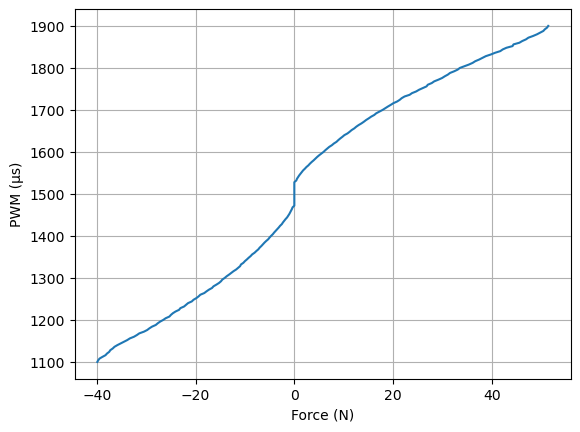

In [9]:
plt.plot(x, y)
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()

In [10]:
# positive side
model = LinearRegression().fit(x[x>0].to_numpy().reshape((-1, 1)), y[x>0].to_numpy())
m_p = model.coef_[0]
b_p = model.intercept_

print("positive: mx + b: {}, {}".format(m_p, b_p))

# negative side
model = LinearRegression().fit(x[x<0].to_numpy().reshape((-1, 1)), y[x<0].to_numpy())
m_n = model.coef_[0]
b_n = model.intercept_

print("negative: mx + b: {}, {}".format(m_n, b_n))

positive: mx + b: 6.792284259536045, 1563.8915056025257
negative: mx + b: 8.725175866752007, 1437.510548864634


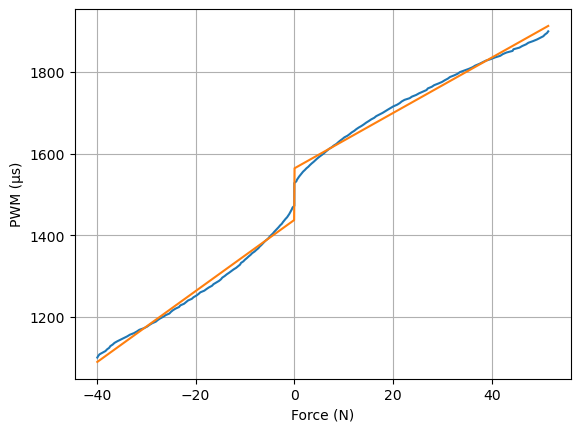

In [11]:
x_simp = np.linspace(x.to_numpy()[0], x.to_numpy()[-1], 1000)

plt.plot(x, y)
plt.plot(x_simp, np.where(x_simp > 0, m_p*x_simp + b_p, m_n*x_simp + b_n))
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()

In [13]:
# task 1
def cubicPoly(t, z_init, z_final, t_final):
    a_2 = 3*(z_final - z_init)/t_final**2
    a_3 = -2*(z_final - z_init)/t_final**3
    z_d = z_init + a_2*t**2 + a_3*t**3
    zdot_d = z_init + 2*a_2*t + 3*a_3*t**2
    if t > t_final:
        zdot_d = 0
    return z_d, zdot_d

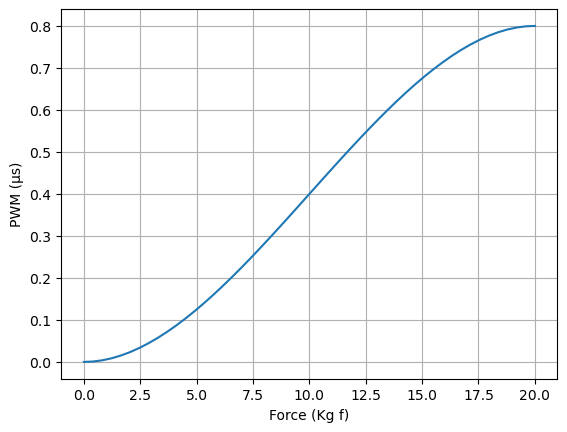

In [21]:
T = np.linspace(0, 20)
z_init = 0
z_final = 0.8

z = [cubicPoly(t, z_init, z_final, T[-1]) for t in T]
plt.plot(T, z)
plt.grid()
plt.xlabel("Force (N)")
plt.ylabel("PWM (µs)")
plt.show()
# T[-1]